## 앙상블 기법

- 여러 개의 분류기를 생성하고 그 예측을 결합하여 정확한 최종 예측을 기대하는 기법
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측 값을 얻는 것


### bagging

- 데이터를 중복을 허용해서 샘플링하고 그 각각의 데이터에 같은 알고리즘을 적용해서 결과를 투표로 결정함
- 각각의 분류기에 데이터를 각각 샘플링해서 추출하는 방식을 부트스트래핑 분할 방식이라고 함 

## 랜덤포레스트

- 같은 알고리즘으로 구현하는 bagging의 대표적인 방법
- 앙상블 방법 중에서 비교적 속도가 빠르며 다양한 영역에서 높은 성능을 보여주고 있음
- 랜덤 포레스트는 결정 나무를 기본으로 함

### HAR (Human Activity Recognition)

- IMU 센서를 활용해서 사람의 행동을 인식하는 실험

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 


feature_name_df = pd.read_csv("/home/dev_ws/ML/data/features.txt", sep = '\s+', header = None,
                              names = ['column_index', 'column_name'])
feature_name_df.head()


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [9]:
len(feature_name_df)

561

In [10]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [11]:
X_train = pd.read_csv('/home/kkyu/amr_ws/ML/data/X_train.txt', sep = '\s+', header = None)
X_test = pd.read_csv('/home/kkyu/amr_ws/ML/data/X_test.txt', sep = '\s+', header = None)

In [12]:
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
y_train = pd.read_csv('/home/kkyu/amr_ws/ML/data/y_train.txt', sep = '\s+', header = None, names = ['action'])
y_test = pd.read_csv('/home/kkyu/amr_ws/ML/data/y_test.txt', sep = '\s+', header = None, names = ['action'])

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### 각 액션별 데이터의 수

In [15]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state= 13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

### max_depth를 다양하게 하기 위해 GridSearchCV를 이용

In [17]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy',
                       cv = 5, return_train_score = True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [18]:
grid_cv.best_score_

0.8543335321892183

In [19]:
grid_cv.best_params_

{'max_depth': 8}

### max_depth별로 표로 성능을 정리

In [20]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


### 실제 test 데이터에서의 결과

In [21]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    df_dlf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_Depth = ', depth, ', Accuracy = ', accuracy)

Max_Depth =  6 , Accuracy =  0.8096369189005769
Max_Depth =  8 , Accuracy =  0.8096369189005769
Max_Depth =  10 , Accuracy =  0.8096369189005769
Max_Depth =  12 , Accuracy =  0.8096369189005769
Max_Depth =  16 , Accuracy =  0.8096369189005769
Max_Depth =  20 , Accuracy =  0.8096369189005769
Max_Depth =  24 , Accuracy =  0.8096369189005769


### 베스트 모델의 결과

In [22]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

### 랜덤포레스트 적용


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs = 1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

/home/kkyu/venv/machine_venv/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/kkyu/venv/machine_venv/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/kkyu/venv/machine_venv/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/kkyu/venv/machine_venv/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [24]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [25]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators',
              'param_max_depth']

cv_result_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
25,1,0.915125,100,10
28,1,0.915125,100,10
20,3,0.912813,200,8
23,3,0.912813,200,8
35,5,0.912541,200,10


### best 모델

In [26]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [27]:
grid_cv.best_score_

0.9151251360174102

### test 데이터에 적용

In [28]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

/home/kkyu/venv/machine_venv/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9205972175093315

### 중요 특성 확인

In [29]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index = X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

### 주요 특성 관찰

/tmp/ipykernel_13808/542836699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top20_cols, y = top20_cols.index, palette='Set3')


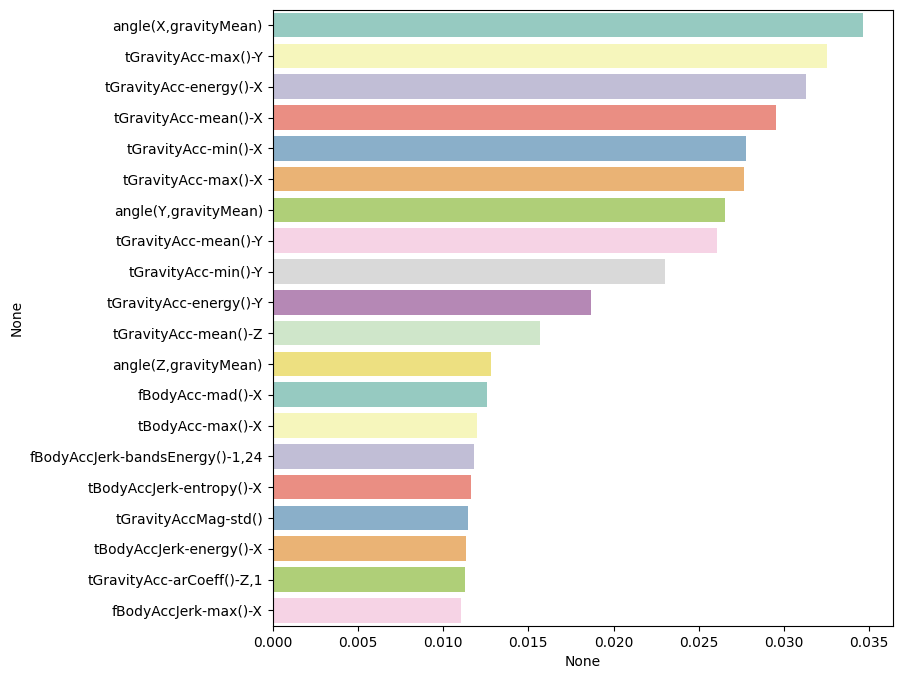

In [37]:
import seaborn as sns 

plt.figure(figsize = (8, 8))

sns.barplot(x = top20_cols, y = top20_cols.index, palette='Set3')
plt.show()

In [38]:
top20_cols.index

Index(['angle(X,gravityMean)', 'tGravityAcc-max()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-mean()-X', 'tGravityAcc-min()-X', 'tGravityAcc-max()-X',
       'angle(Y,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-Y',
       'tGravityAcc-energy()-Y', 'tGravityAcc-mean()-Z',
       'angle(Z,gravityMean)', 'fBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'fBodyAccJerk-bandsEnergy()-1,24', 'tBodyAccJerk-entropy()-X',
       'tGravityAccMag-std()', 'tBodyAccJerk-energy()-X',
       'tGravityAcc-arCoeff()-Z,1', 'fBodyAccJerk-max()-X'],
      dtype='object')

In [40]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

### 20개 특성만 가지고 다시 성능 확인

In [41]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249